In [16]:
import numpy as np
token_respaldo = "3938d584da2079d438247185d70ebb11ba80d9918d093e48847ef0bae2baab10bce13b33c75918d79cdba7ce8458a58b15663a554f47d5241976a501294c90d0"
token_uc = "f357e84602c6054693aa4b405885636006fd0814819b4b5be7c2839059ae57b029bdf5092d66b9d84d0878d9daa7ea8f74497eeec41a075c54d59924f03ae020"

def hellinger_distance(p, q):
    """
    Calcula la distancia de Hellinger entre dos distribuciones de probabilidad discretas.

    :param p: Primera distribución de probabilidad (array de numpy).
    :param q: Segunda distribución de probabilidad (array de numpy).
    :return: Distancia de Hellinger entre p y q.
    """
    # Asegurarse de que p y q son arrays de numpy
    p = np.asarray(p)
    q = np.asarray(q)
    
    # Calcular la distancia de Hellinger
    distance = np.sqrt(0.5 * np.sum((np.sqrt(p) - np.sqrt(q)) ** 2))
    
    return distance


In [17]:
def probabilidad(results, N_Q, n_q):
    probabilidades = []


    for i in range(N_Q - n_q):
        probabilidad = []
        for j in results.results[i].data.counts:
            count = results.results[i].data.counts[j]
            #print(count)
            probabilidad.append(float(count/50000))
        probabilidades.append(np.array(probabilidad))
            
    return(probabilidades)

In [18]:
def probabilidad_GHZ(experimento):
    
    """Esta funcion recibe las probabilidades de un experimento y devuelve la probabilidad esperada para un estado GHZ ideal"""
    
    def two_largest_indices(arr):
        # Obtener los índices que ordenarían el array de menor a mayor
        sorted_indices = np.argsort(arr)
        
        # Tomar los dos últimos índices, que corresponden a los valores más grandes
        return sorted_indices[-2], sorted_indices[-1]
        
    nq = len(experimento)
    indices = two_largest_indices(np.array(experimento))
    
    probabilidad = [None] *(nq)
    for i in range(nq):
        probabilidad[i] = 0
    probabilidad[indices[0]] = 1/2
    probabilidad[indices[1]] = 1/2
    
    return probabilidad

In [19]:
def probabilidad_3l(nq):
    probabilidad = [None] * (nq)
    for i in range(nq):
        probabilidad[i] = 1/(nq)
    
    return probabilidad
    

In [20]:
#sampler.run
#si_result.append(job.result()[i])

In [21]:

def main(trabajos: list, N_Q: int, n_q: int, token_):
    from qiskit_ibm_runtime import QiskitRuntimeService

    service = QiskitRuntimeService(channel="ibm_quantum",
    token=token_)
    
    """
    Esta funcion se encarga de calcular la distancia hellinger de uno o varios experimentos comparandolos
    con su resultado teorico
    Input: una lista de listas de forma [[Job_ID_1, tipo_experimento (GHZ o 3l)], .....]
    Output: una lista de distancias hellinger
    """
    hellingers = list()
    
    for trabajo in trabajos:
        job_id = trabajo[0]
        #print(job_id)
        retrieved_job = service.job(job_id)
        #print(trabajo)
        results = retrieved_job.result()
        #print(f"results:{results.results[0].data.counts}")
        prob_experimentos = probabilidad(results, N_Q, n_q)
        #print(f"prob experimentos{prob_experimentos}")
        hellinger_ = []
        
        for prob in prob_experimentos:
            if trabajo[1] == "GHZ":
                #print("GHZ")
                prob_teorica = probabilidad_GHZ(list(prob))
            else:
                #print("3l")
                prob_teorica = probabilidad_3l(len(prob))
            
            #print(prob_teorica)
            #print(prob)
            hellinger_.append(hellinger_distance(prob, prob_teorica))
        hellingers.append(hellinger_)
            
    return hellingers

In [22]:
##Insertar los job id pertinentes

trabajos_r = [["cvqqdhy20wjg008q3z80", "3l"], ["cvqqdjyxx5ag008h7t00", "3l"]]
trabajos_uc = [["cvqqenjzrwzg008awmhg", "3l"]]

"Optimizado direccional, Control, Optimizado no direccional"

N_Q = 8
n_q = 3

hellingers = main(trabajos_r, N_Q, n_q, token_respaldo)
hellingers_ = main(trabajos_uc, N_Q, n_q, token_uc)
hellingers.append(hellingers_[0])


In [25]:
print(hellingers)

[[0.016951560487953935, 0.03230094139095036, 0.2652667912498307, 0.03600697462865729, 0.02741126713034015, 0.05158112107588489, 0.08541670633154684, 0.10246122992855639, 0.13126039312044455, 0.18989132562596434], [0.021901236002878778, 0.025788388692665976, 0.03500831414336928, 0.056371100147387256, 0.14438463285350603, 0.08504344436293404, 0.09686940864412809, 0.13433884776744948, 0.16420338240632326, 0.19948909051666786], [0.034845235913656465, 0.02836386536684082, 0.09195444735842775, 0.06602713276162907, 0.07183716468159947, 0.081677979894539, 0.07837994591711711, 0.13372025685775846, 0.160076761280457, 0.19060533276100908]]


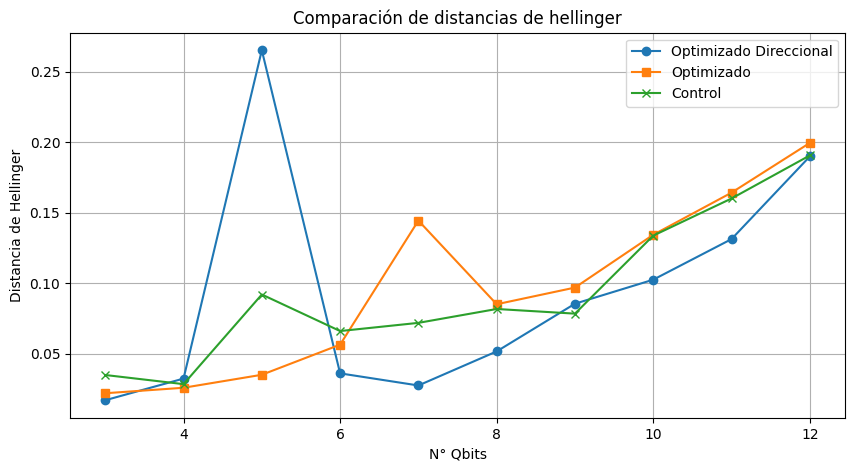

In [30]:
"""Esta parte del codigo se encarga de graficar las Hellingers"""

import matplotlib.pyplot as plt

claves = list(range(13 - n_q))
    
xlabel = list(range(n_q, 13))
valores1 = [hellingers[0][clave] for clave in claves]
valores2 = [hellingers[1][clave] for clave in claves]
valores3 = [hellingers[2][clave] for clave in claves]
#valores4 = [hellingers[3][clave] for clave in claves]

plt.figure(figsize=(10, 5))
#print(valores1)
#print(valores2)
plt.plot(xlabel, valores1, marker='o', label='Optimizado Direccional')
plt.plot(xlabel, valores2, marker='s', label='Optimizado')
plt.plot(xlabel, valores3, marker='x', label='Control')
#plt.plot(xlabel, valores4, marker='*', label='Optimizado direccional')

# Añadir títulos y etiquetas
plt.title('Comparación de distancias de hellinger')
plt.xlabel('N° Qbits')
plt.ylabel('Distancia de Hellinger')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()